In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn
#import
%matplotlib inline

Source: https://www.kaggle.com/sogun3/uspollution
Context

This dataset deals with pollution in the U.S. Pollution in the U.S. has been well documented by the U.S. EPA but it is a pain to download all the data and arrange them in a format that interests data scientists. Hence I gathered four major pollutants (Nitrogen Dioxide, Sulphur Dioxide, Carbon Monoxide and Ozone) for every day from 2000 - 2016 and place them neatly in a csv file.
Content

There is a total of 28 fields:

    State Code : The code allocated by US EPA to each state
    County code : The code of counties in a specific state allocated by US EPA
    Site Num : The site number in a specific county allocated by US EPA
    Address: Address of the monitoring site
    State : State of monitoring site
    County : County of monitoring site
    City : City of the monitoring site
    Date Local : Date of monitoring

The four pollutants (NO2, O3, SO2 and O3) each has 5 specific columns. For instance, for NO2:

    NO2 Units : The units measured for NO2
    NO2 Mean : The arithmetic mean of concentration of NO2 within a given day
    NO2 AQI : The calculated air quality index of NO2 within a given day
    NO2 1st Max Value : The maximum value obtained for NO2 concentration in a given day
    NO2 1st Max Hour : The hour when the maximum NO2 concentration was recorded in a given day

Observations totaled to over 1.4 million.
Acknowledgements

All the data is scraped from the database of U.S. EPA : https://aqsdr1.epa.gov/aqsweb/aqstmp/airdata/download_files.html
Inspiration

I did a related project with some of my friends in college, and decided to open source our dataset so that data scientists don't need to rescrape the U.S. EPA site for historical pollution data.

However, I want to make this dataset bigger, potentially covering more information, and more countries. Please contact me if interested.

In [3]:
df = pd.read_csv("/media/radial/Work/Work/Work on datasets/US pollution*/pollution_us_2000_2016.csv", error_bad_lines=False)
df.head()

Unnamed: 0  State Code  County Code  Site Num  \
0           0           4           13      3002   
1           1           4           13      3002   
2           2           4           13      3002   
3           3           4           13      3002   
4           4           4           13      3002   

                                   Address    State    County     City  \
0  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
1  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
2  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
3  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
4  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   

   Date Local          NO2 Units  ...            SO2 Units  SO2 Mean  \
0  2000-01-01  Parts per billion  ...    Parts per billion  3.000000   
1  2000-01-01  Parts per billion  ...    Parts per billion  3.000000   
2  2000-01-01  Parts per billion  ...    Parts per billion  2.975000   
3  2000-01-01  Parts per billion  ...    Parts per billion  2.975000   
4  2000-01-02  Parts per billion  ...    Parts per billion  1.958333   

   SO2 1st Max Value  SO2 1st Max Hour SO2 AQI           CO Units   CO Mean  \
0                9.0                21    13.0  Parts per million  1.145833   
1                9.0                21    13.0  Parts per million  0.878947   
2                6.6                23     NaN  Parts per million  1.145833   
3                6.6                23     NaN  Parts per million  0.878947   
4                3.0                22     4.0  Parts per million  0.850000   

   CO 1st Max Value  CO 1st Max Hour CO AQI  
0               4.2               21    NaN  
1               2.2               23   25.0  
2               4.2               21    NaN  
3               2.2               23   25.0  
4               1.6               23    NaN  

[5 rows x 29 columns]

In [4]:
sub = df[['State', 'County', 'City', 'Date Local', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI']]

In [5]:
df.columns

Index(['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'Address',
       'State', 'County', 'City', 'Date Local', 'NO2 Units', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI'],
      dtype='object')

In [6]:
df.shape

(1746661, 29)

In [7]:
df.isnull().sum()

Unnamed: 0                0
State Code                0
County Code               0
Site Num                  0
Address                   0
State                     0
County                    0
City                      0
Date Local                0
NO2 Units                 0
NO2 Mean                  0
NO2 1st Max Value         0
NO2 1st Max Hour          0
NO2 AQI                   0
O3 Units                  0
O3 Mean                   0
O3 1st Max Value          0
O3 1st Max Hour           0
O3 AQI                    0
SO2 Units                 0
SO2 Mean                  0
SO2 1st Max Value         0
SO2 1st Max Hour          0
SO2 AQI              872907
CO Units                  0
CO Mean                   0
CO 1st Max Value          0
CO 1st Max Hour           0
CO AQI               873323
dtype: int64

In [8]:
df.describe()

Unnamed: 0    State Code   County Code      Site Num      NO2 Mean  \
count  1.746661e+06  1.746661e+06  1.746661e+06  1.746661e+06  1.746661e+06   
mean   5.471414e+04  2.230907e+01  7.169381e+01  1.118214e+03  1.282193e+01   
std    3.372908e+04  1.725621e+01  7.948023e+01  2.003103e+03  9.504814e+00   
min    0.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00 -2.000000e+00   
25%    2.575300e+04  6.000000e+00  1.700000e+01  9.000000e+00  5.750000e+00   
50%    5.304500e+04  1.700000e+01  5.900000e+01  6.000000e+01  1.073913e+01   
75%    8.033600e+04  4.000000e+01  9.700000e+01  1.039000e+03  1.771364e+01   
max    1.345750e+05  8.000000e+01  6.500000e+02  9.997000e+03  1.395417e+02   

       NO2 1st Max Value  NO2 1st Max Hour       NO2 AQI       O3 Mean  \
count       1.746661e+06      1.746661e+06  1.746661e+06  1.746661e+06   
mean        2.541485e+01      1.173102e+01  2.389822e+01  2.612485e-02   
std         1.599963e+01      7.877501e+00  1.516280e+01  1.136974e-02   
min        -2.000000e+00      0.000000e+00  0.000000e+00  0.000000e+00   
25%         1.300000e+01      5.000000e+00  1.200000e+01  1.787500e-02   
50%         2.400000e+01      9.000000e+00  2.300000e+01  2.587500e-02   
75%         3.570000e+01      2.000000e+01  3.300000e+01  3.391700e-02   
max         2.670000e+02      2.300000e+01  1.320000e+02  9.508300e-02   

       O3 1st Max Value  O3 1st Max Hour        O3 AQI      SO2 Mean  \
count      1.746661e+06     1.746661e+06  1.746661e+06  1.746661e+06   
mean       3.920331e-02     1.017053e+01  3.605012e+01  1.870364e+00   
std        1.534362e-02     4.003144e+00  1.978042e+01  2.760435e+00   
min        0.000000e+00     0.000000e+00  0.000000e+00 -2.000000e+00   
25%        2.900000e-02     9.000000e+00  2.500000e+01  2.565220e-01   
50%        3.800000e-02     1.000000e+01  3.300000e+01  9.875000e-01   
75%        4.800000e-02     1.100000e+01  4.200000e+01  2.325000e+00   
max        1.410000e-01     2.300000e+01  2.180000e+02  3.216250e+02   

       SO2 1st Max Value  SO2 1st Max Hour        SO2 AQI       CO Mean  \
count       1.746661e+06      1.746661e+06  873754.000000  1.746661e+06   
mean        4.492185e+00      9.664906e+00       7.115945  3.682177e-01   
std         7.679866e+00      6.731228e+00      11.937473  3.140231e-01   
min        -2.000000e+00      0.000000e+00       0.000000 -4.375000e-01   
25%         8.000000e-01      5.000000e+00       1.000000  1.834580e-01   
50%         2.000000e+00      8.000000e+00       3.000000  2.926250e-01   
75%         5.000000e+00      1.400000e+01       9.000000  4.666670e-01   
max         3.510000e+02      2.300000e+01     200.000000  7.508333e+00   

       CO 1st Max Value  CO 1st Max Hour         CO AQI  
count      1.746661e+06     1.746661e+06  873338.000000  
mean       6.201067e-01     7.875026e+00       5.996595  
std        6.439361e-01     7.978844e+00       5.851836  
min       -4.000000e-01     0.000000e+00       0.000000  
25%        2.920000e-01     0.000000e+00       2.000000  
50%        4.000000e-01     6.000000e+00       5.000000  
75%        8.000000e-01     1.300000e+01       8.000000  
max        1.990000e+01     2.300000e+01     201.000000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746661 entries, 0 to 1746660
Data columns (total 29 columns):
Unnamed: 0           int64
State Code           int64
County Code          int64
Site Num             int64
Address              object
State                object
County               object
City                 object
Date Local           object
NO2 Units            object
NO2 Mean             float64
NO2 1st Max Value    float64
NO2 1st Max Hour     int64
NO2 AQI              int64
O3 Units             object
O3 Mean              float64
O3 1st Max Value     float64
O3 1st Max Hour      int64
O3 AQI               int64
SO2 Units            object
SO2 Mean             float64
SO2 1st Max Value    float64
SO2 1st Max Hour     int64
SO2 AQI              float64
CO Units             object
CO Mean              float64
CO 1st Max Value     float64
CO 1st Max Hour      int64
CO AQI               float64
dtypes: float64(10), int64(10), object(9)
memory usage: 386.5+ MB


In [10]:
for i in df.columns:
    print(i,len(df[i].unique()))

Unnamed: 0 134576
State Code 47
County Code 73
Site Num 110
Address 204
State 47
County 133
City 144
Date Local 5996
NO2 Units 1
NO2 Mean 31859
NO2 1st Max Value 990
NO2 1st Max Hour 24
NO2 AQI 129
O3 Units 1
O3 Mean 8196
O3 1st Max Value 134
O3 1st Max Hour 24
O3 AQI 125
SO2 Units 1
SO2 Mean 12736
SO2 1st Max Value 921
SO2 1st Max Hour 24
SO2 AQI 141
CO Units 1
CO Mean 34123
CO 1st Max Value 2698
CO 1st Max Hour 24
CO AQI 108


In [11]:
sub.shape

(1746661, 20)

In [12]:
sub.tail(20)

State   County           City  Date Local  NO2 Mean  \
1746641  Wyoming  Laramie  Not in a city  2016-03-27  4.277273   
1746642  Wyoming  Laramie  Not in a city  2016-03-27  4.277273   
1746643  Wyoming  Laramie  Not in a city  2016-03-27  4.277273   
1746644  Wyoming  Laramie  Not in a city  2016-03-27  4.277273   
1746645  Wyoming  Laramie  Not in a city  2016-03-28  8.317391   
1746646  Wyoming  Laramie  Not in a city  2016-03-28  8.317391   
1746647  Wyoming  Laramie  Not in a city  2016-03-28  8.317391   
1746648  Wyoming  Laramie  Not in a city  2016-03-28  8.317391   
1746649  Wyoming  Laramie  Not in a city  2016-03-29  2.564706   
1746650  Wyoming  Laramie  Not in a city  2016-03-29  2.564706   
1746651  Wyoming  Laramie  Not in a city  2016-03-29  2.564706   
1746652  Wyoming  Laramie  Not in a city  2016-03-29  2.564706   
1746653  Wyoming  Laramie  Not in a city  2016-03-30  1.083333   
1746654  Wyoming  Laramie  Not in a city  2016-03-30  1.083333   
1746655  Wyoming  Laramie  Not in a city  2016-03-30  1.083333   
1746656  Wyoming  Laramie  Not in a city  2016-03-30  1.083333   
1746657  Wyoming  Laramie  Not in a city  2016-03-31  0.939130   
1746658  Wyoming  Laramie  Not in a city  2016-03-31  0.939130   
1746659  Wyoming  Laramie  Not in a city  2016-03-31  0.939130   
1746660  Wyoming  Laramie  Not in a city  2016-03-31  0.939130   

         NO2 1st Max Value  NO2 1st Max Hour  NO2 AQI   O3 Mean  \
1746641               23.5                23       22  0.041958   
1746642               23.5                23       22  0.041958   
1746643               23.5                23       22  0.041958   
1746644               23.5                23       22  0.041958   
1746645               22.6                 6       21  0.041292   
1746646               22.6                 6       21  0.041292   
1746647               22.6                 6       21  0.041292   
1746648               22.6                 6       21  0.041292   
1746649                3.6                 6        3  0.028000   
1746650                3.6                 6        3  0.028000   
1746651                3.6                 6        3  0.028000   
1746652                3.6                 6        3  0.028000   
1746653                1.6                 9        1  0.043917   
1746654                1.6                 9        1  0.043917   
1746655                1.6                 9        1  0.043917   
1746656                1.6                 9        1  0.043917   
1746657                1.3                 5        1  0.045263   
1746658                1.3                 5        1  0.045263   
1746659                1.3                 5        1  0.045263   
1746660                1.3                 5        1  0.045263   

         O3 1st Max Value  O3 1st Max Hour  O3 AQI  SO2 Mean  \
1746641             0.050               10      46 -0.095238   
1746642             0.050               10      46 -0.095238   
1746643             0.050               10      46 -0.066667   
1746644             0.050               10      46 -0.066667   
1746645             0.052                9      48  0.117391   
1746646             0.052                9      48  0.117391   
1746647             0.052                9      48  0.100000   
1746648             0.052                9      48  0.100000   
1746649             0.040               23      37  0.143750   
1746650             0.040               23      37  0.143750   
1746651             0.040               23      37  0.120000   
1746652             0.040               23      37  0.120000   
1746653             0.048               18      44  0.016667   
1746654             0.048               18      44  0.016667   
1746655             0.048               18      44  0.000000   
1746656             0.048               18      44  0.000000   
1746657             0.047                9      44 -0.022727   
1746658             0.047                9      44 -0.022727   


In [13]:
#9/11 check
wtc = df[df["Date Local"]=='2001-09-11']
wtc = wtc[wtc["City"]=="New York"]
wtc

Unnamed: 0  State Code  County Code  Site Num  \
156767       65121          36           81        97   
156768       65122          36           81        97   
156769       65123          36           81        97   
156770       65124          36           81        97   

                             Address     State  County      City  Date Local  \
156767  56TH AVE AT SPRINGFIELD BLVD  New York  Queens  New York  2001-09-11   
156768  56TH AVE AT SPRINGFIELD BLVD  New York  Queens  New York  2001-09-11   
156769  56TH AVE AT SPRINGFIELD BLVD  New York  Queens  New York  2001-09-11   
156770  56TH AVE AT SPRINGFIELD BLVD  New York  Queens  New York  2001-09-11   

                NO2 Units  ...            SO2 Units  SO2 Mean  \
156767  Parts per billion  ...    Parts per billion  2.791667   
156768  Parts per billion  ...    Parts per billion  2.791667   
156769  Parts per billion  ...    Parts per billion  2.775000   
156770  Parts per billion  ...    Parts per billion  2.775000   

        SO2 1st Max Value  SO2 1st Max Hour SO2 AQI           CO Units  \
156767                5.0                 6     7.0  Parts per million   
156768                5.0                 6     7.0  Parts per million   
156769                5.0                 8     NaN  Parts per million   
156770                5.0                 8     NaN  Parts per million   

         CO Mean  CO 1st Max Value  CO 1st Max Hour CO AQI  
156767  0.337500               0.6                6    NaN  
156768  0.354167               0.4                0    5.0  
156769  0.337500               0.6                6    NaN  
156770  0.354167               0.4                0    5.0  

[4 rows x 29 columns]

In [14]:
x = sub.groupby("State").sum()
x.head()

NO2 Mean  NO2 1st Max Value  NO2 1st Max Hour   NO2 AQI  \
State                                                                     
Alabama     2.941782e+04            71801.4             41132     66372   
Alaska      2.233216e+04            41546.6             24120     38598   
Arizona     1.331707e+06          2681758.4            993892   2521712   
Arkansas    3.446178e+05           815960.8            429644    759160   
California  7.865429e+06         14744708.0           6489904  13890921   

                 O3 Mean  O3 1st Max Value  O3 1st Max Hour    O3 AQI  \
State                                                                   
Alabama        76.935612           120.144            29050    115178   
Alaska         25.265290            37.734            20414     34990   
Arizona      1745.251098          3011.824           706922   2724046   
Arkansas      924.590416          1369.672           354980   1237880   
California  15010.161591         22365.606          5879226  20581332   

                 SO2 Mean  SO2 1st Max Value  SO2 1st Max Hour    SO2 AQI  \
State                                                                       
Alabama       3233.023144       1.322360e+04             33624    10956.0   
Alaska       12009.332190       1.906760e+04             19708    14299.0   
Arizona      95276.629811       1.905699e+05            715716   147156.0   
Arkansas     48874.830852       8.027840e+04            354596    52570.0   
California  660659.304621       1.343432e+06           4902215  1037139.0   

                  CO Mean  CO 1st Max Value  CO 1st Max Hour     CO AQI  
State                                                                    
Alabama        664.608589          1273.490            29529     6018.0  
Alaska         835.866138          1337.580            20014     6450.0  
Arizona      34264.618297         68616.119           664301   321070.0  
Arkansas     14923.978472         19733.424           280514   104746.0  
California  257814.656268        443216.700          4281282  2133277.0

In [15]:
x = sub.State.value_counts()
state = pd.DataFrame(x,index=None)
state["Number"] = state.State
state.State = state.index
state.index = range(len(state.index))
state.head()

State  Number
0    California  576142
1  Pennsylvania  188892
2         Texas  123208
3      New York   70487
4       Arizona   69840

In [16]:
state.shape

(47, 2)

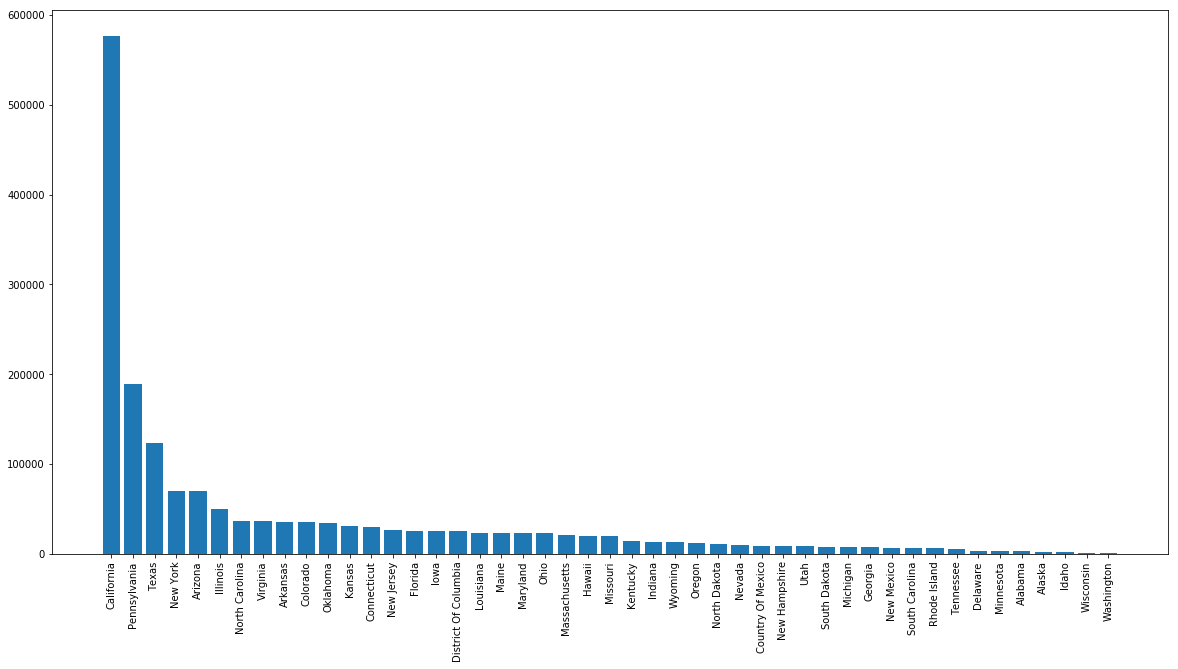

In [17]:
import pylab as pylt
hist = pd.DataFrame(df["State"].value_counts())
hist.columns = ["Col"]
#hist.sort_index(inplace=True)
x = list(range(47))
labels = hist.index
pylt.rcParams['figure.figsize'] = (20.0, 10.0)
pylt.bar(x,hist.Col)
#pylt.ylim(0,25000)
pylt.xticks(x, labels, rotation='vertical')
#pylt.title("Kills state-wise")
#pylt.text(35,20000,"~Directly proportional to population 'U.S. Census Bureau'")
pylt.show()

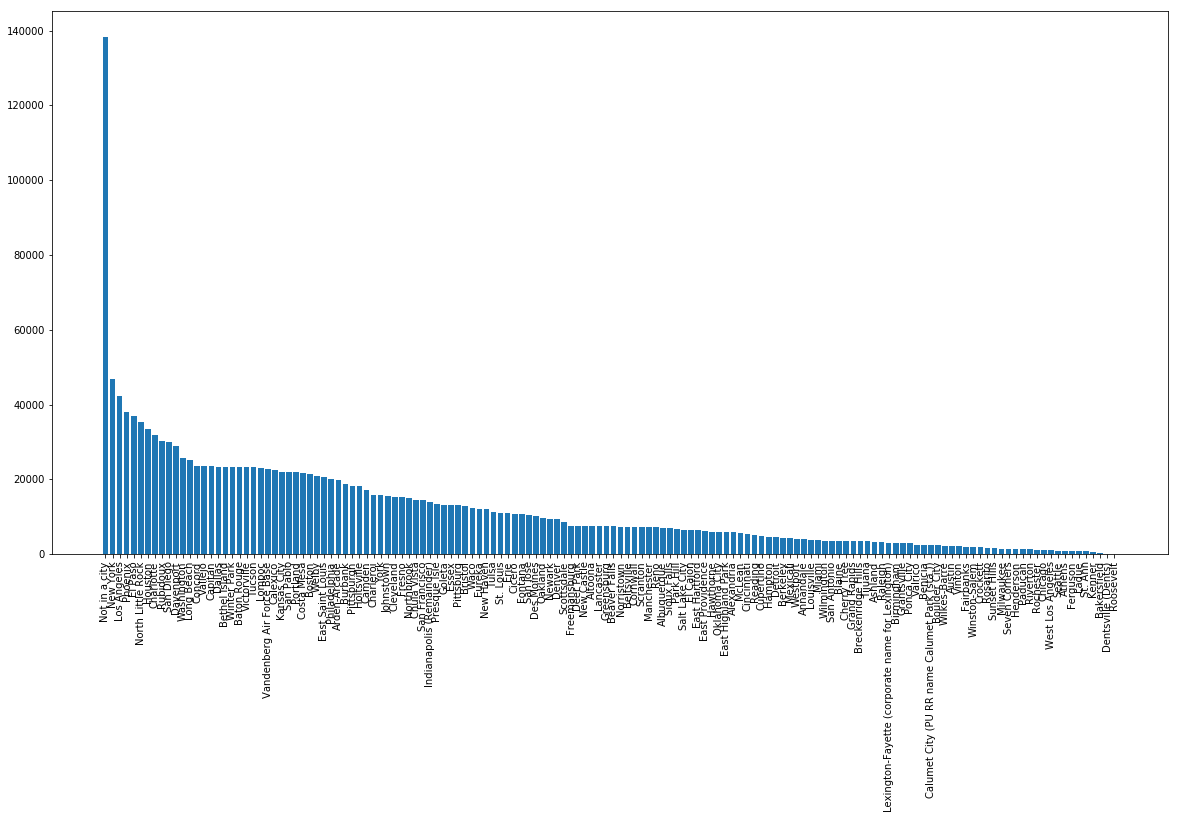

In [18]:
hist = pd.DataFrame(df["City"].value_counts())
hist.columns = ["Col"]
#hist.sort_index(inplace=True)
x = list(range(len(hist.index)))
labels = hist.index
pylt.rcParams['figure.figsize'] = (20.0, 10.0)
pylt.bar(x,hist.Col)
#pylt.ylim(0,25000)
pylt.xticks(x, labels, rotation='vertical')
#pylt.title("Kills state-wise")
#pylt.text(35,20000,"~Directly proportional to population 'U.S. Census Bureau'")
pylt.show()

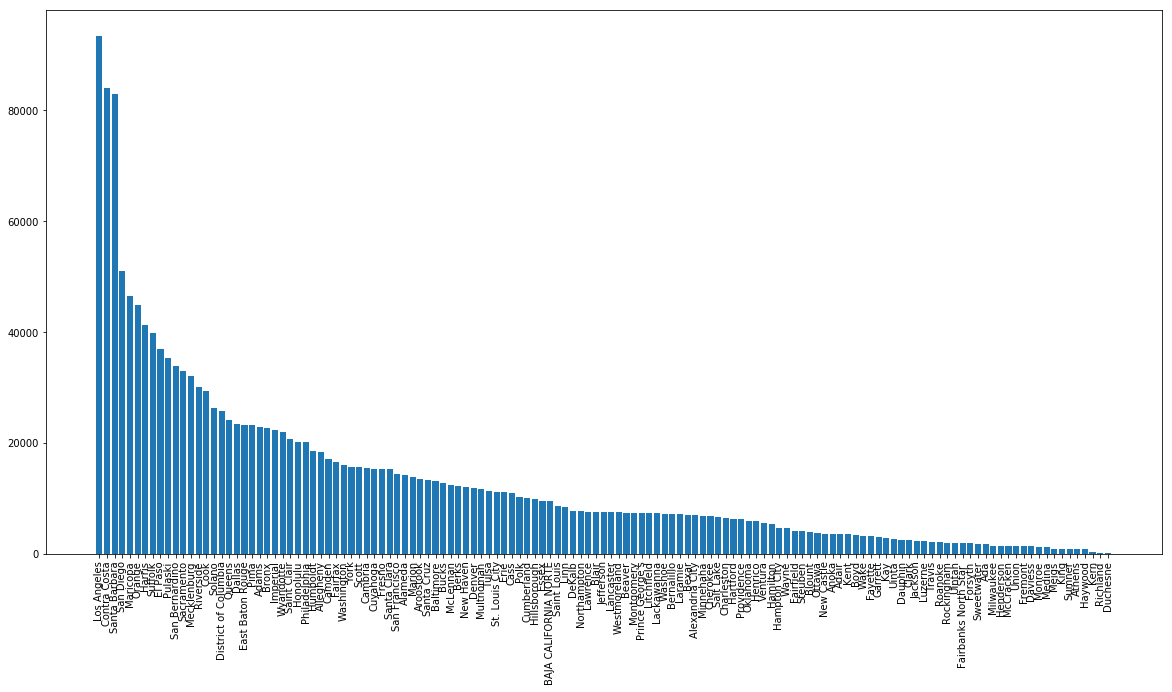

In [19]:
hist = pd.DataFrame(df["County"].value_counts())
hist.columns = ["Col"]
#hist.sort_index(inplace=True)
x = list(range(len(hist.index)))
labels = hist.index
pylt.rcParams['figure.figsize'] = (20.0, 10.0)
pylt.bar(x,hist.Col)
#pylt.ylim(0,25000)
pylt.xticks(x, labels, rotation='vertical')
#pylt.title("Kills state-wise")
#pylt.text(35,20000,"~Directly proportional to population 'U.S. Census Bureau'")
pylt.show()

In [20]:
sub.shape

(1746661, 20)

In [21]:
sub.isnull().sum()

State                     0
County                    0
City                      0
Date Local                0
NO2 Mean                  0
NO2 1st Max Value         0
NO2 1st Max Hour          0
NO2 AQI                   0
O3 Mean                   0
O3 1st Max Value          0
O3 1st Max Hour           0
O3 AQI                    0
SO2 Mean                  0
SO2 1st Max Value         0
SO2 1st Max Hour          0
SO2 AQI              872907
CO Mean                   0
CO 1st Max Value          0
CO 1st Max Hour           0
CO AQI               873323
dtype: int64

In [22]:
subp = sub[sub["State"]=="Pennsylvania"]
subp.shape

(188892, 20)

In [23]:
subt = sub[sub["State"]=="Texas"]
subt.shape

(123208, 20)

In [24]:
subc = sub[sub["State"]=="California"]
subc.shape

(576142, 20)

# Multiple rows check

In [25]:
gsub = sub.groupby(["State","County","City","Date Local"]).mean()

In [26]:
gsub.head()

NO2 Mean  NO2 1st Max Value  \
State   County    City       Date Local                                 
Alabama Jefferson Birmingham 2013-12-01  17.208333               39.3   
                             2013-12-02  20.687500               32.4   
                             2013-12-03  14.912500               22.4   
                             2013-12-04   7.825000               19.3   
                             2013-12-05   8.004762               16.0   

                                         NO2 1st Max Hour  NO2 AQI   O3 Mean  \
State   County    City       Date Local                                        
Alabama Jefferson Birmingham 2013-12-01              18.0     37.0  0.013542   
                             2013-12-02               7.0     30.0  0.009375   
                             2013-12-03              17.0     21.0  0.008167   
                             2013-12-04              17.0     18.0  0.011125   
                             2013-12-05               7.0     15.0  0.010083   

                                         O3 1st Max Value  O3 1st Max Hour  \
State   County    City       Date Local                                      
Alabama Jefferson Birmingham 2013-12-01             0.026              9.0   
                             2013-12-02             0.013              0.0   
                             2013-12-03             0.012             22.0   
                             2013-12-04             0.014              8.0   
                             2013-12-05             0.014             18.0   

                                         O3 AQI  SO2 Mean  SO2 1st Max Value  \
State   County    City       Date Local                                        
Alabama Jefferson Birmingham 2013-12-01    24.0  0.285390               0.75   
                             2013-12-02    12.0  0.531666               2.10   
                             2013-12-03    11.0  0.252632               1.35   
                             2013-12-04    13.0  0.123052               0.95   
                             2013-12-05    13.0 -0.014285               0.60   

                                         SO2 1st Max Hour  SO2 AQI   CO Mean  \
State   County    City       Date Local                                        
Alabama Jefferson Birmingham 2013-12-01              11.0      1.0  0.262879   
                             2013-12-02              11.0      3.0  0.352812   
                             2013-12-03              12.5      3.0  0.237575   
                             2013-12-04              17.0      1.0  0.115152   
                             2013-12-05               2.5      1.0  0.117575   

                                         CO 1st Max Value  CO 1st Max Hour  \
State   County    City       Date Local                                      
Alabama Jefferson Birmingham 2013-12-01             0.650              8.5   
                             2013-12-02             0.485              8.0   
                             2013-12-03             0.325              4.0   
                             2013-12-04             0.220             18.5   
                             2013-12-05             0.200             17.5   

                                         CO AQI  
State   County    City       Date Local          
Alabama Jefferson Birmingham 2013-12-01     6.0  
                             2013-12-02     6.0  
                             2013-12-03     3.0  
                             2013-12-04     2.0  
                             2013-12-05     2.0

In [27]:
gsub.shape

(392352, 16)

In [28]:
ids = pd.DataFrame(list(gsub.index))
ids.columns = ["State","County","City","Date"]
ids.head()

State     County        City        Date
0  Alabama  Jefferson  Birmingham  2013-12-01
1  Alabama  Jefferson  Birmingham  2013-12-02
2  Alabama  Jefferson  Birmingham  2013-12-03
3  Alabama  Jefferson  Birmingham  2013-12-04
4  Alabama  Jefferson  Birmingham  2013-12-05

In [29]:
ids.shape

(392352, 4)

In [30]:
x = ids["Date"]
x

0         2013-12-01
1         2013-12-02
2         2013-12-03
3         2013-12-04
4         2013-12-05
5         2013-12-06
6         2013-12-07
7         2013-12-08
8         2013-12-09
9         2013-12-10
10        2013-12-11
11        2013-12-12
12        2013-12-13
13        2013-12-14
14        2013-12-15
15        2013-12-16
16        2013-12-17
17        2013-12-18
18        2013-12-19
19        2013-12-20
20        2013-12-21
21        2013-12-22
22        2013-12-23
23        2013-12-24
24        2013-12-25
25        2013-12-26
26        2013-12-27
27        2013-12-28
28        2013-12-29
29        2013-12-30
             ...    
392322    2008-10-13
392323    2008-10-14
392324    2008-10-15
392325    2008-10-16
392326    2008-10-17
392327    2008-10-18
392328    2008-10-19
392329    2008-10-20
392330    2008-10-21
392331    2008-10-22
392332    2008-10-23
392333    2008-10-24
392334    2008-10-25
392335    2008-10-26
392336    2008-10-27
392337    2008-10-28
392338    200

In [31]:
x.index = gsub.index

In [32]:
gsub["Date"] = x
gsub.Date.value_counts()

2008-04-01    89
2008-04-03    88
2008-08-23    88
2008-04-19    88
2008-07-22    88
2008-04-17    88
2008-04-09    88
2008-04-08    88
2008-04-21    88
2008-09-23    88
2008-09-19    88
2008-08-22    88
2008-09-26    88
2008-09-22    88
2008-07-21    88
2008-04-02    88
2008-08-26    88
2008-04-18    88
2008-08-29    87
2008-04-04    87
2008-08-19    87
2008-08-15    87
2008-07-14    87
2008-07-09    87
2008-03-31    87
2008-09-20    87
2008-07-17    87
2008-04-20    87
2008-08-18    87
2008-07-18    87
              ..
2016-05-17     5
2016-05-25     5
2016-05-29     5
2016-05-22     5
2016-05-20     5
2016-05-09     5
2016-05-16     5
2016-05-15     5
2016-05-08     5
2016-05-05     5
2016-05-13     5
2016-05-10     5
2016-05-24     5
2016-05-23     5
2016-05-03     5
2016-05-27     5
2016-05-21     5
2016-05-11     5
2016-05-28     5
2016-05-18     5
2016-05-12     5
2016-05-04     5
2016-05-02     5
2016-05-06     5
2016-05-26     5
2016-05-19     5
2016-05-01     5
2016-05-31    

In [33]:
gsub.head()

NO2 Mean  NO2 1st Max Value  \
State   County    City       Date Local                                 
Alabama Jefferson Birmingham 2013-12-01  17.208333               39.3   
                             2013-12-02  20.687500               32.4   
                             2013-12-03  14.912500               22.4   
                             2013-12-04   7.825000               19.3   
                             2013-12-05   8.004762               16.0   

                                         NO2 1st Max Hour  NO2 AQI   O3 Mean  \
State   County    City       Date Local                                        
Alabama Jefferson Birmingham 2013-12-01              18.0     37.0  0.013542   
                             2013-12-02               7.0     30.0  0.009375   
                             2013-12-03              17.0     21.0  0.008167   
                             2013-12-04              17.0     18.0  0.011125   
                             2013-12-05               7.0     15.0  0.010083   

                                         O3 1st Max Value  O3 1st Max Hour  \
State   County    City       Date Local                                      
Alabama Jefferson Birmingham 2013-12-01             0.026              9.0   
                             2013-12-02             0.013              0.0   
                             2013-12-03             0.012             22.0   
                             2013-12-04             0.014              8.0   
                             2013-12-05             0.014             18.0   

                                         O3 AQI  SO2 Mean  SO2 1st Max Value  \
State   County    City       Date Local                                        
Alabama Jefferson Birmingham 2013-12-01    24.0  0.285390               0.75   
                             2013-12-02    12.0  0.531666               2.10   
                             2013-12-03    11.0  0.252632               1.35   
                             2013-12-04    13.0  0.123052               0.95   
                             2013-12-05    13.0 -0.014285               0.60   

                                         SO2 1st Max Hour  SO2 AQI   CO Mean  \
State   County    City       Date Local                                        
Alabama Jefferson Birmingham 2013-12-01              11.0      1.0  0.262879   
                             2013-12-02              11.0      3.0  0.352812   
                             2013-12-03              12.5      3.0  0.237575   
                             2013-12-04              17.0      1.0  0.115152   
                             2013-12-05               2.5      1.0  0.117575   

                                         CO 1st Max Value  CO 1st Max Hour  \
State   County    City       Date Local                                      
Alabama Jefferson Birmingham 2013-12-01             0.650              8.5   
                             2013-12-02             0.485              8.0   
                             2013-12-03             0.325              4.0   
                             2013-12-04             0.220             18.5   
                             2013-12-05             0.200             17.5   

                                         CO AQI        Date  
State   County    City       Date Local                      
Alabama Jefferson Birmingham 2013-12-01     6.0  2013-12-01  
                             2013-12-02     6.0  2013-12-02  
                             2013-12-03     3.0  2013-12-03  
                             2013-12-04     2.0  2013-12-04  
                             2013-12-05     2.0  2013-12-05

In [34]:
x = ids["City"]
x.index = gsub.index
gsub["City"] =x
x = ids["County"]
x.index = gsub.index
gsub["County"] =x
x = ids["State"]
x.index = gsub.index
gsub["State"] =x

In [35]:
gsub.head()

NO2 Mean  NO2 1st Max Value  \
State   County    City       Date Local                                 
Alabama Jefferson Birmingham 2013-12-01  17.208333               39.3   
                             2013-12-02  20.687500               32.4   
                             2013-12-03  14.912500               22.4   
                             2013-12-04   7.825000               19.3   
                             2013-12-05   8.004762               16.0   

                                         NO2 1st Max Hour  NO2 AQI   O3 Mean  \
State   County    City       Date Local                                        
Alabama Jefferson Birmingham 2013-12-01              18.0     37.0  0.013542   
                             2013-12-02               7.0     30.0  0.009375   
                             2013-12-03              17.0     21.0  0.008167   
                             2013-12-04              17.0     18.0  0.011125   
                             2013-12-05               7.0     15.0  0.010083   

                                         O3 1st Max Value  O3 1st Max Hour  \
State   County    City       Date Local                                      
Alabama Jefferson Birmingham 2013-12-01             0.026              9.0   
                             2013-12-02             0.013              0.0   
                             2013-12-03             0.012             22.0   
                             2013-12-04             0.014              8.0   
                             2013-12-05             0.014             18.0   

                                         O3 AQI  SO2 Mean  SO2 1st Max Value  \
State   County    City       Date Local                                        
Alabama Jefferson Birmingham 2013-12-01    24.0  0.285390               0.75   
                             2013-12-02    12.0  0.531666               2.10   
                             2013-12-03    11.0  0.252632               1.35   
                             2013-12-04    13.0  0.123052               0.95   
                             2013-12-05    13.0 -0.014285               0.60   

                                         SO2 1st Max Hour  SO2 AQI   CO Mean  \
State   County    City       Date Local                                        
Alabama Jefferson Birmingham 2013-12-01              11.0      1.0  0.262879   
                             2013-12-02              11.0      3.0  0.352812   
                             2013-12-03              12.5      3.0  0.237575   
                             2013-12-04              17.0      1.0  0.115152   
                             2013-12-05               2.5      1.0  0.117575   

                                         CO 1st Max Value  CO 1st Max Hour  \
State   County    City       Date Local                                      
Alabama Jefferson Birmingham 2013-12-01             0.650              8.5   
                             2013-12-02             0.485              8.0   
                             2013-12-03             0.325              4.0   
                             2013-12-04             0.220             18.5   
                             2013-12-05             0.200             17.5   

                                         CO AQI        Date        City  \
State   County    City       Date Local                                   
Alabama Jefferson Birmingham 2013-12-01     6.0  2013-12-01  Birmingham   
                             2013-12-02     6.0  2013-12-02  Birmingham   
                             2013-12-03     3.0  2013-12-03  Birmingham   
                             2013-12-04     2.0  2013-12-04  Birmingham   
                             2013-12-05     2.0  2013-12-05  Birmingham   

                                            County    State  
State   County    City       Date Local                      
Alabama Jefferson Birmingham 2013-12-01  Jefferson  Alabama  
                             2013-12-02  

In [36]:
gsub.describe()

NO2 Mean  NO2 1st Max Value  NO2 1st Max Hour        NO2 AQI  \
count  392352.000000      392352.000000     392352.000000  392352.000000   
mean       12.711460          25.131633         11.725263      23.634696   
std         9.436382          15.918455          7.824622      15.073487   
min        -2.000000          -2.000000          0.000000       0.000000   
25%         5.708696          13.000000          5.000000      12.000000   
50%        10.666667          23.300000          9.000000      22.000000   
75%        17.583333          35.000000         20.000000      33.000000   
max       139.541667         267.000000         23.000000     132.000000   

             O3 Mean  O3 1st Max Value  O3 1st Max Hour         O3 AQI  \
count  392352.000000     392352.000000    392352.000000  392352.000000   
mean        0.026141          0.039166        10.178699      35.980497   
std         0.011400          0.015340         4.013386      19.720526   
min         0.000000          0.000000         0.000000       0.000000   
25%         0.017875          0.029000         9.000000      25.000000   
50%         0.025917          0.038000        10.000000      33.000000   
75%         0.033958          0.048000        11.000000      42.000000   
max         0.095083          0.141000        23.000000     218.000000   

            SO2 Mean  SO2 1st Max Value  SO2 1st Max Hour        SO2 AQI  \
count  392352.000000      392352.000000     392352.000000  392352.000000   
mean        1.915860           4.620242          9.640867       7.337217   
std         2.834678           7.603944          6.259587      12.174778   
min        -1.725155          -1.400000          0.000000       0.000000   
25%         0.263542           0.800000          4.500000       1.000000   
50%         0.997916           2.000000          9.500000       3.000000   
75%         2.387500           5.300000         13.500000       9.000000   
max       321.612500         350.800000         23.000000     200.000000   

             CO Mean  CO 1st Max Value  CO 1st Max Hour         CO AQI  
count  392352.000000     392352.000000    392352.000000  392161.000000  
mean        0.364696          0.614982         7.853083       5.941735  
std         0.310388          0.617193         6.695503       5.845715  
min        -0.420833         -0.350000         0.000000       0.000000  
25%         0.185416          0.250000         3.000000       2.000000  
50%         0.291666          0.450000         6.500000       5.000000  
75%         0.460417          0.750000        11.000000       7.000000  
max         7.151993         17.700000        23.000000     201.000000

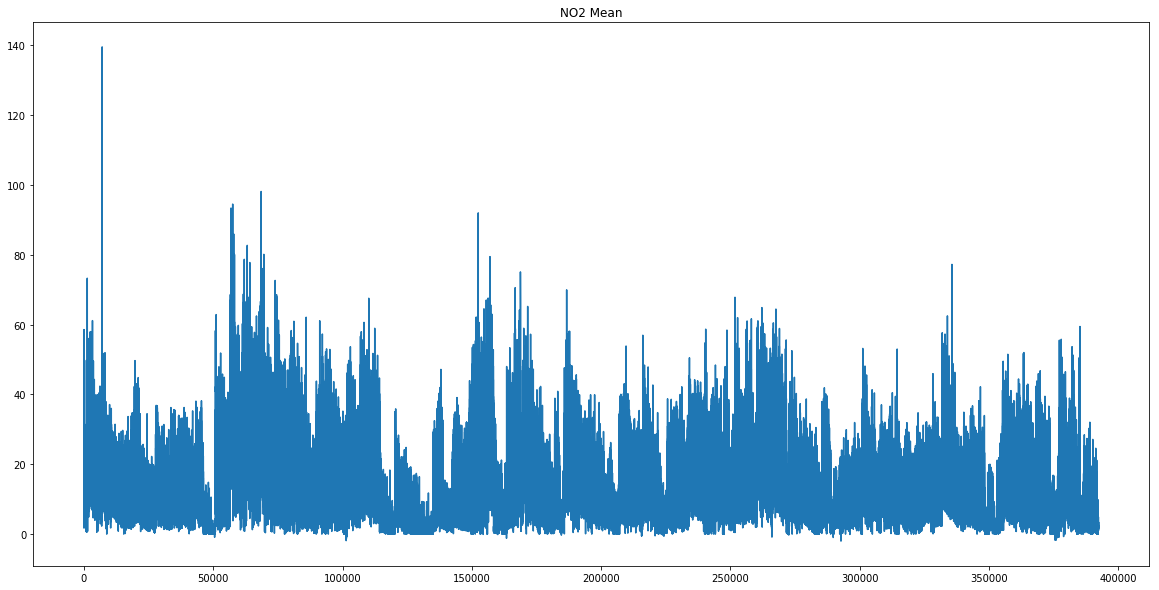

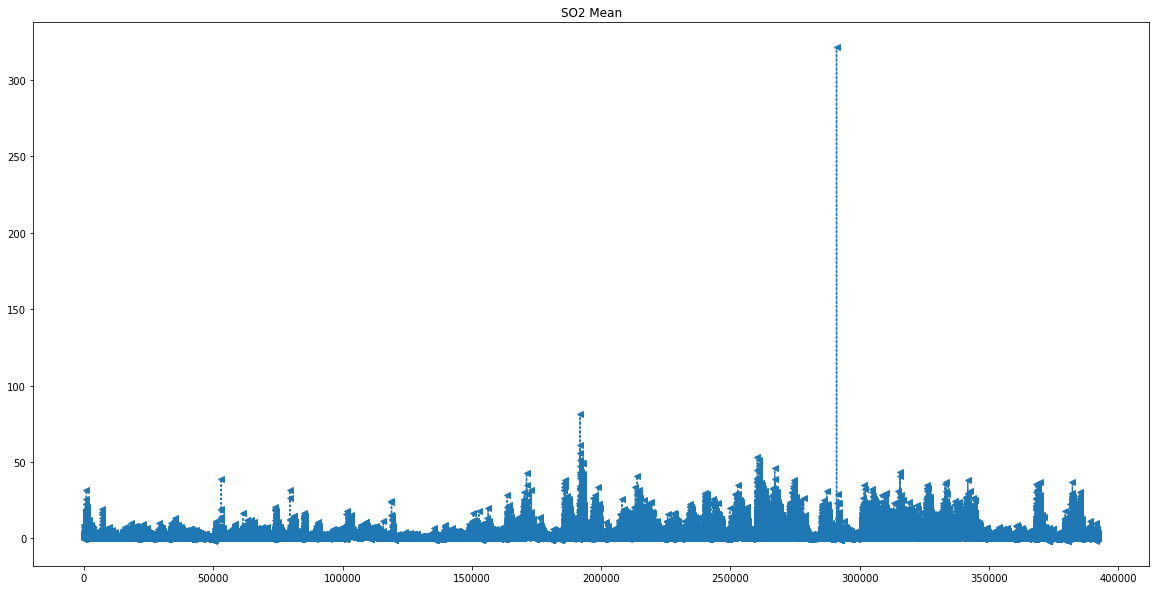

In [46]:
#import pylab as pylt
#x = range(len(gsub.Date))
#labels = gsub.Date
plt.plot(range(len(gsub["NO2 Mean"])),gsub["NO2 Mean"])
plt.title("NO2 Mean")
#pylt.xticks(x, labels, rotation='vertical')
plt.show()
plt.plot(range(len(gsub["CO Mean"])),gsub["CO Mean"])
pylt.title("CO Mean")
#plt.xticks(x, labels, rotation='vertical')
plt.show()
plt.plot(range(len(gsub["SO2 Mean"])),gsub["SO2 Mean"])
plt.title("SO2 Mean")
#pylt.xticks(x, labels, rotation='vertical')
plt.show()
plt.plot(range(len(gsub["O3 Mean"])),gsub["O3 Mean"])
plt.title("O3 Mean")
#pylt.xticks(x, labels, rotation='vertical')
plt.show()



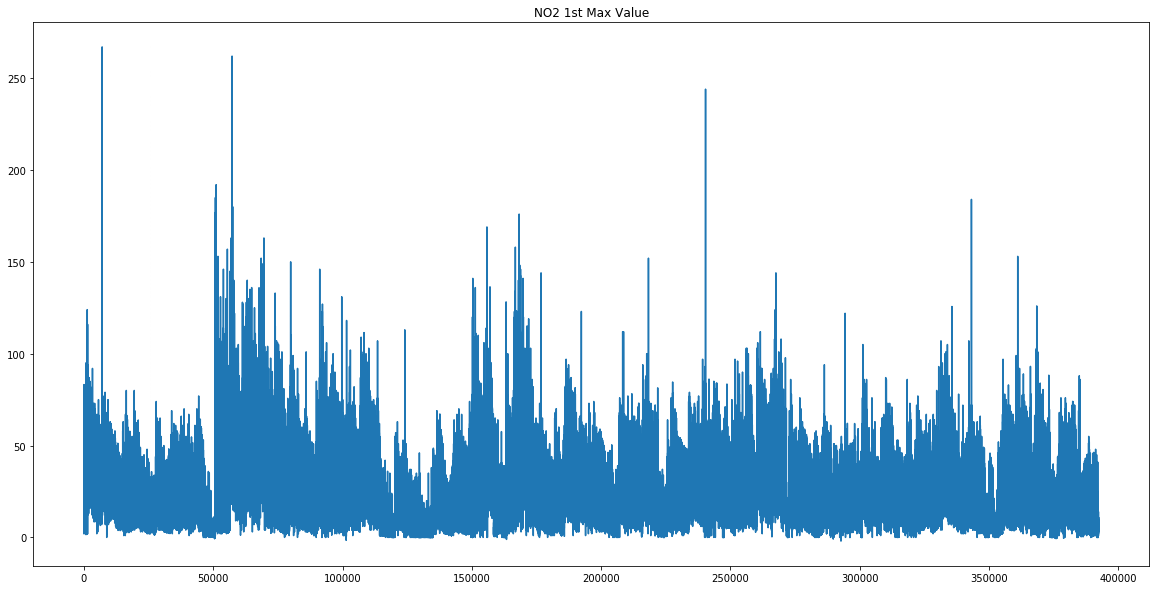

In [38]:
plt.plot(range(len(gsub["NO2 1st Max Value"])),gsub["NO2 1st Max Value"])
plt.title("NO2 1st Max Value")
#pylt.xticks(x, labels, rotation='vertical')
plt.show()
plt.plot(range(len(gsub["CO 1st Max Value"])),gsub["CO 1st Max Value"])
pylt.title("CO 1st Max Value")
#plt.xticks(x, labels, rotation='vertical')
plt.show()
plt.plot(range(len(gsub["SO2 1st Max Value"])),gsub["SO2 1st Max Value"])
plt.title("SO2 1st Max Value")
#pylt.xticks(x, labels, rotation='vertical')
plt.show()
plt.plot(range(len(gsub["O3 1st Max Value"])),gsub["O3 1st Max Value"])
plt.title("O3 1st Max Value")
#pylt.xticks(x, labels, rotation='vertical')
plt.show()

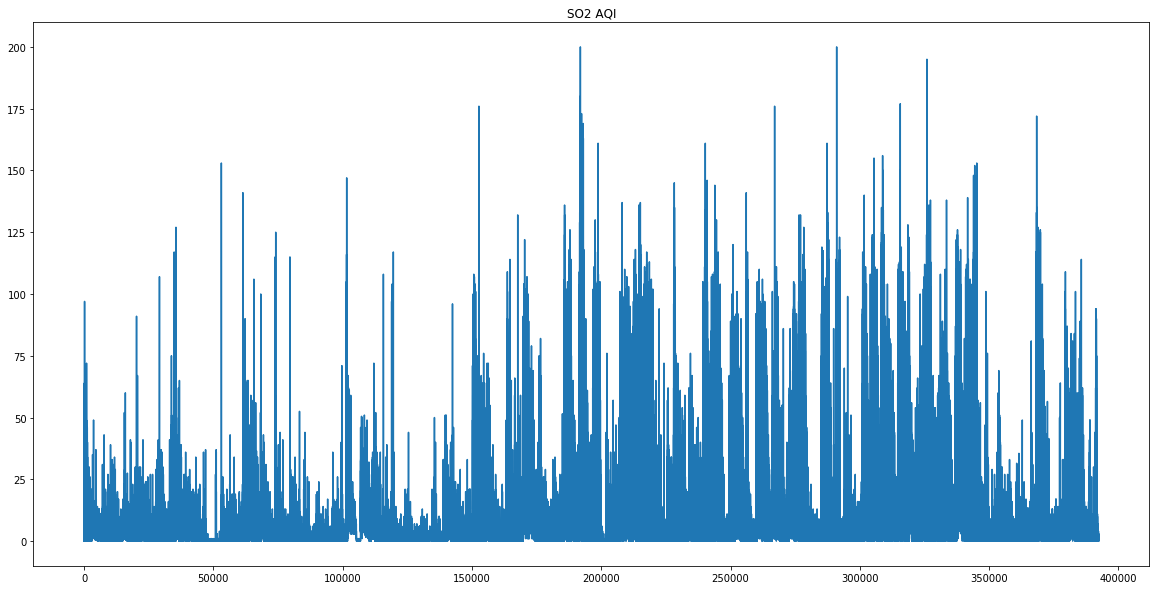

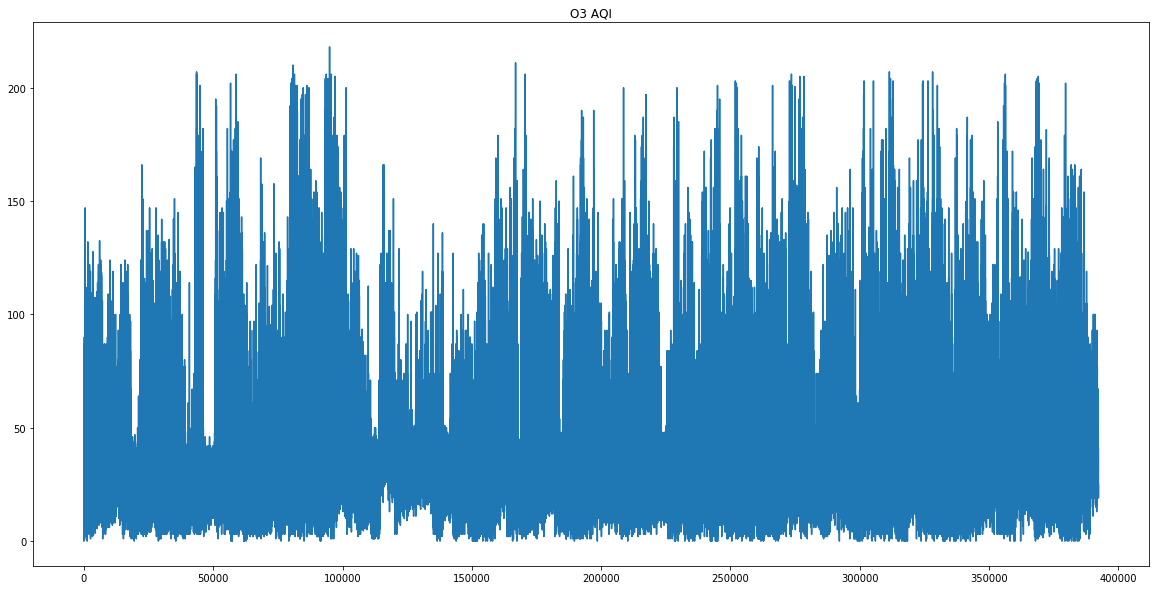

In [40]:
plt.plot(range(len(gsub["NO2 AQI"])),gsub["NO2 AQI"])
plt.title("NO2 AQI")
#pylt.xticks(x, labels, rotation='vertical')
plt.show()
plt.plot(range(len(gsub["CO AQI"])),gsub["CO AQI"])
pylt.title("CO AQI")
#plt.xticks(x, labels, rotation='vertical')
plt.show()
plt.plot(range(len(gsub["SO2 1st Max Hour"])),gsub["SO2 AQI"])
plt.title("SO2 AQI")
#pylt.xticks(x, labels, rotation='vertical')
plt.show()
plt.plot(range(len(gsub["O3 1st Max Value"])),gsub["O3 AQI"])
plt.title("O3 AQI")
#pylt.xticks(x, labels, rotation='vertical')
plt.show()

In [44]:
?plt.plot

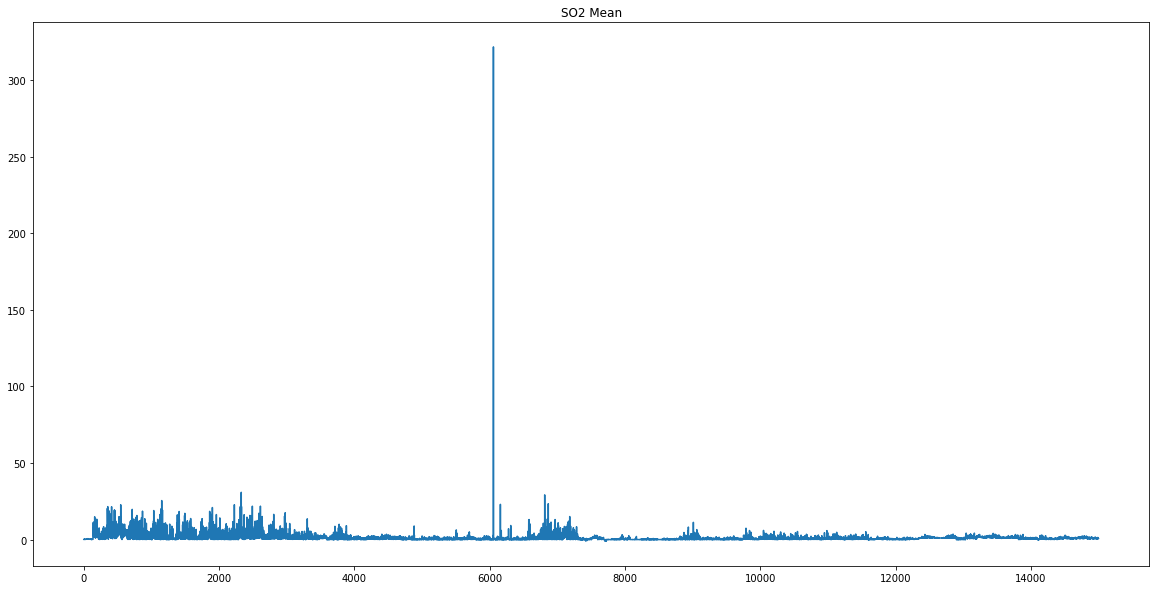

In [54]:
plt.plot(range(len(gsub["SO2 Mean"][285000:300000])),gsub["SO2 Mean"][285000:300000])
plt.title("SO2 Mean")
#pylt.xticks(x, labels, rotation='vertical')
plt.show()

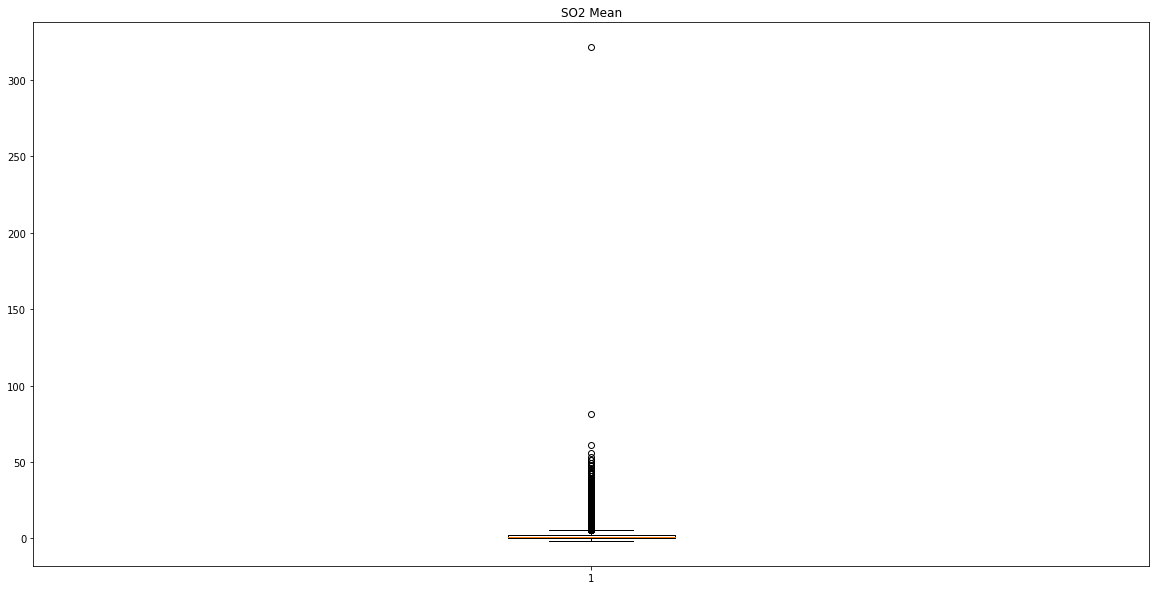

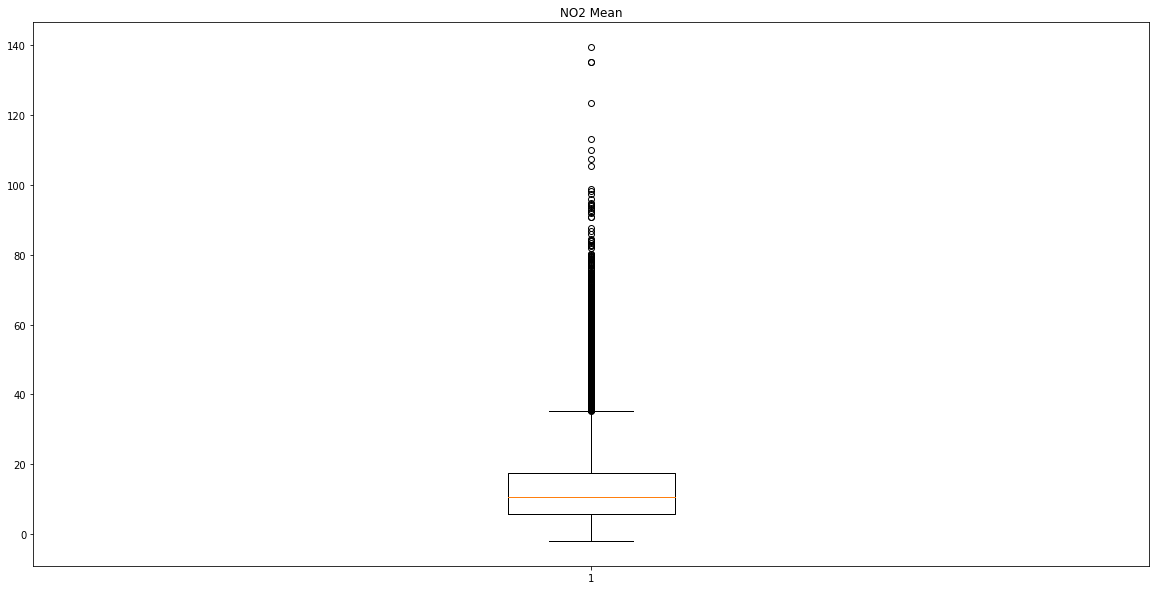

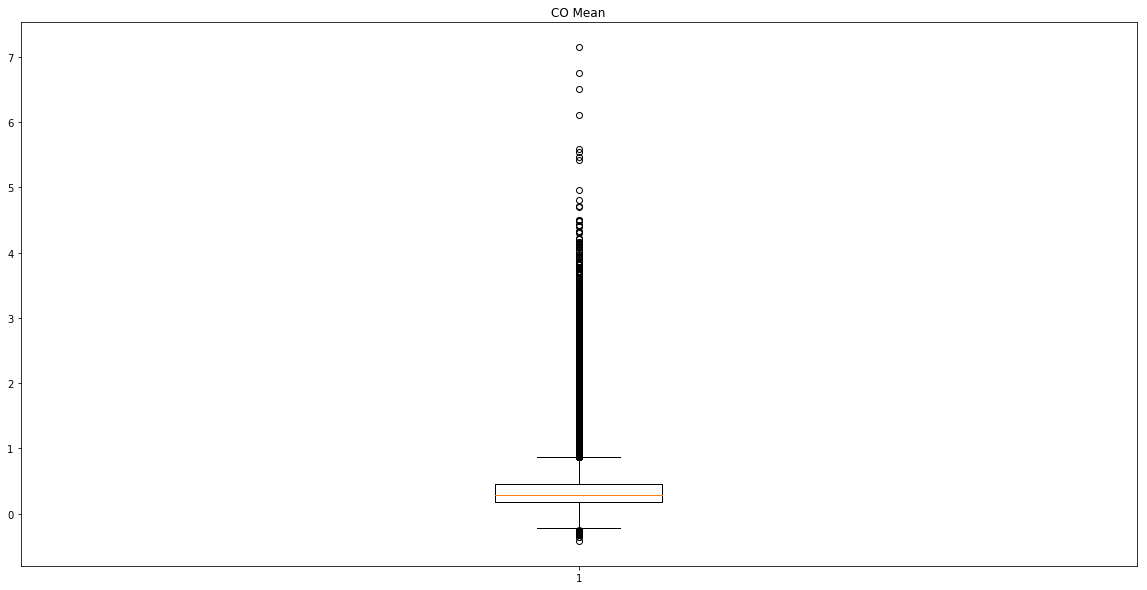

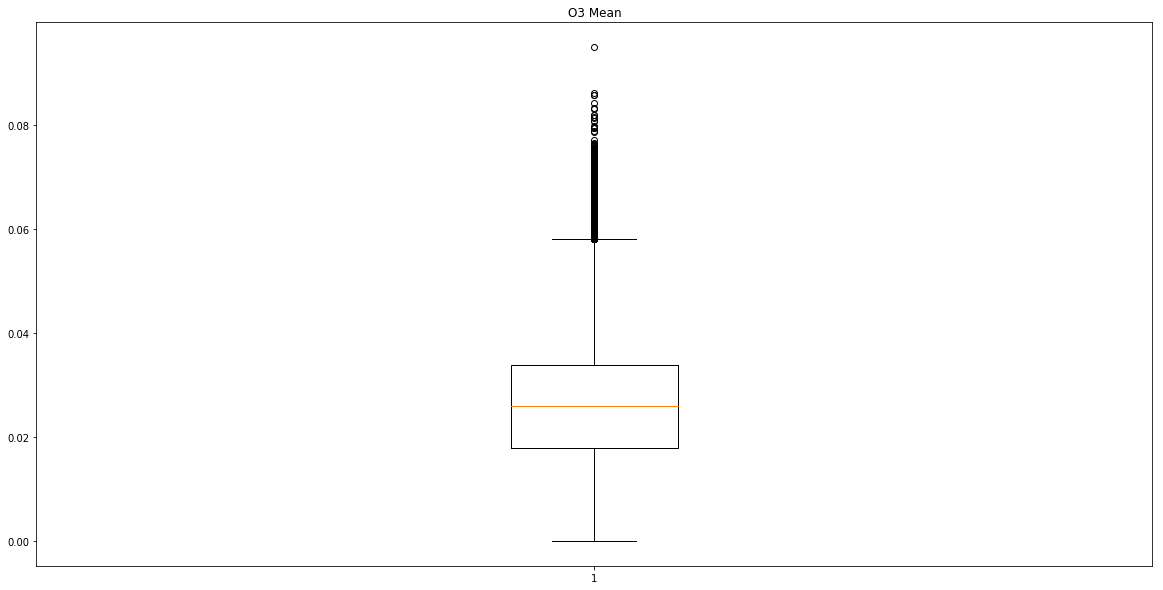

In [64]:
plt.boxplot(gsub["SO2 Mean"])
plt.title("SO2 Mean")
plt.show()
plt.boxplot(gsub["NO2 Mean"])
plt.title("NO2 Mean")
plt.show()
plt.boxplot(gsub["CO Mean"])
plt.title("CO Mean")
plt.show()
plt.boxplot(gsub["O3 Mean"])
plt.title("O3 Mean")
plt.show()

In [70]:
SO_out = gsub[gsub["SO2 Mean"]>10].Date

In [71]:
NO_out = gsub[gsub["NO2 Mean"]>40].Date

In [72]:
CO_out = gsub[gsub["CO Mean"]>1].Date

In [73]:
O_out = gsub[gsub["O3 Mean"]>0.065].Date

In [74]:
dates_out = list(set(SO_out) & set(NO_out) & set(CO_out) & set(O_out))

In [75]:
len(dates_out)

57

(array([  1.,   4.,   5.,   0.,  17.,   7.,   0.,  14.,   6.,   3.]),
 array([  3. ,   3.7,   4.4,   5.1,   5.8,   6.5,   7.2,   7.9,   8.6,
          9.3,  10. ]),
 <a list of 10 Patch objects>)

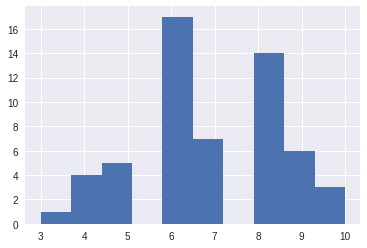

In [161]:
mon = []
for i in range(len(dates_out)):
    mon.append(int(dates_out[i][5:7]))
plt.hist((mon))

# Outliers in middle of the year mostly

In [111]:
diff=[]
for i in range(len(dates_out)-1):
    diff.append(int(str(datetime.datetime.strptime(dates_out[i],"%Y-%m-%d")-datetime.datetime.strptime(dates_out[i+1],"%Y-%m-%d")).strip(" days, 0:00:00")) )

In [127]:
dif = pd.DataFrame([diff,dates_out]).T

In [129]:
dif[dif[0]>-5]

0           1
7   -3  2001-05-09
8   -1  2001-06-08
10  -1  2001-06-18
11  -1  2001-06-19
12  -1  2001-06-29
14  -3  2001-08-04
15  -2  2001-08-07
19  -3  2002-06-19
20  -3  2002-06-22
21  -2  2002-06-25
22  -1  2002-06-27
23  -4  2002-06-28
25  -1  2002-07-08
26  -1  2002-07-09
27  -1  2002-07-10
30  -1  2002-08-01
32  -1  2002-08-09
33  -3  2002-08-10
34  -1  2002-08-13
41  -1  2004-04-26
44  -1  2004-09-06
45  -1  2004-09-07
50  -1  2007-05-07

# NO difference on 9/11?

In [141]:
gsub.columns

Index(['NO2 Mean', 'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Mean',
       'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI', 'CO Mean',
       'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI', 'Date', 'City',
       'County', 'State'],
      dtype='object')

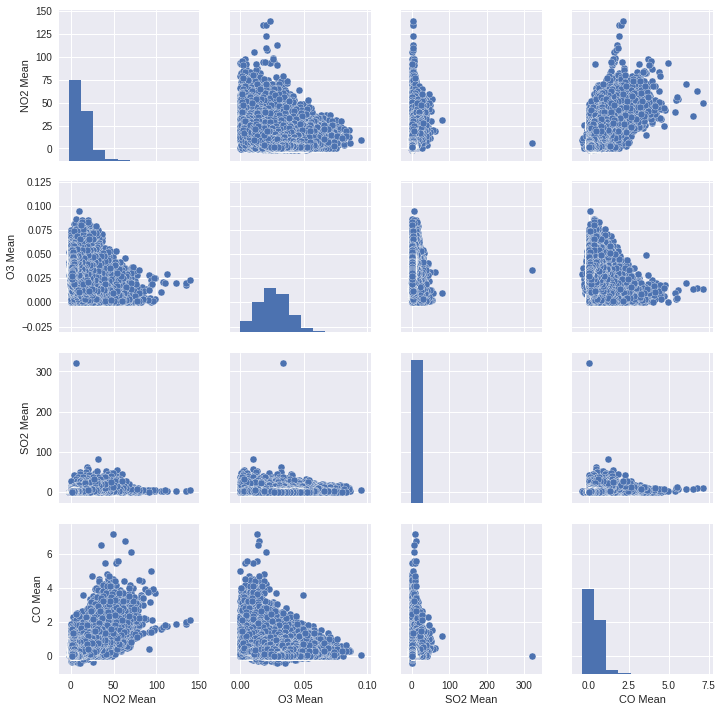

In [154]:
pair= pd.DataFrame(gsub[['NO2 Mean','O3 Mean', 'SO2 Mean', 'CO Mean']])
seaborn.pairplot(pair)